### Step1: Import all libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Step2: Load the data

#### Step2.1: Read the "housing.csv" file from the folder into the program.

In [2]:
df = pd.read_excel("housing_dataset.xlsx")

#### Step2.2: Print first few rows of this data.

In [3]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


#### Step2.3: Extract input (X) and output (Y) data from the dataset.

In [4]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,[-1]].values

#### Plotting the Histogram

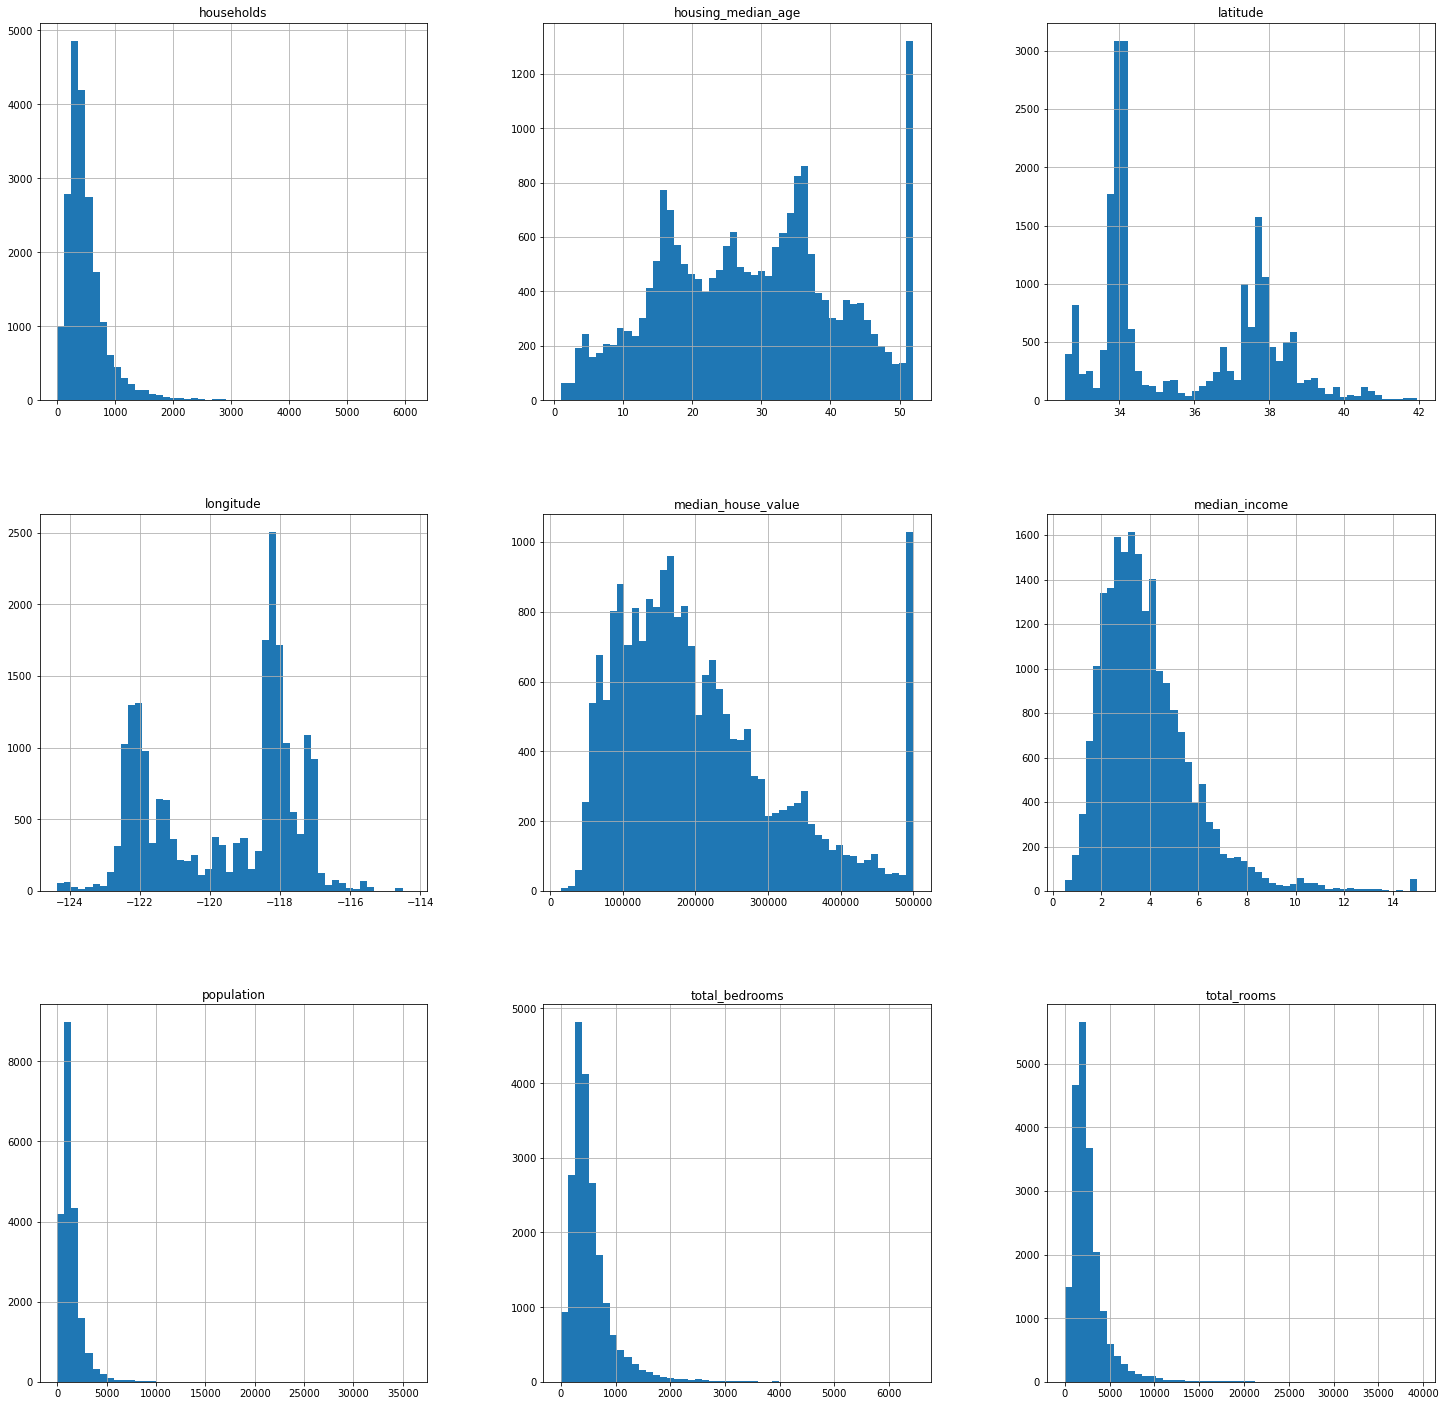

In [5]:
df.hist(bins=50,figsize=(25,25));

#### Ploting the Heatmap for Correlation

<Figure size 1800x1800 with 0 Axes>

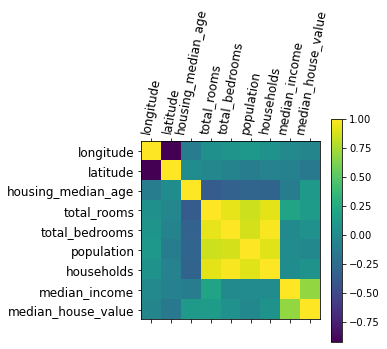

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [6]:
corr = df.corr()
plt.figure(figsize=(25,25))
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=80,fontsize = 12);
plt.yticks(range(len(corr.columns)), corr.columns,fontsize =12);
plt.colorbar()
plt.show()
df.corr().style.background_gradient(cmap='coolwarm')

### Step3: Handle Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Step3.1 : Fill the missing values with the mean of the respective column.

In [8]:
from sklearn.impute import SimpleImputer
im = SimpleImputer()
X[:, : -1] = im.fit_transform(X[:,:-1])
Y = im.fit_transform(Y)

### Step4: Encode Categorical Data

#### Step4.1 : Convert  categorical column in the dataset to numerical data

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,-1] = le.fit_transform(X[:,-1])

### Step5 : Split the dataset 

#### Step5.1 : Split the data into 80% training  dataset and 20% test dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

### Step6 : Standardize data

#### Step6.1: Standardize training  and test datasets

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Y_train = sc.fit_transform(Y_train)
X_test = sc.transform(X_test)
Y_test = sc.transform(Y_test)

# Performing Given Tasks

## Step7 : Perform Linear Regression

#### Step7.1 : Perform  Linear Regression  on training  data.

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Step7.2 : Predict output for test dataset using the fitted model

In [13]:
y_predict = lr.predict(X_test)

#### Step7.3 : Print RMSE from Linear Regression

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,y_predict)
rmse = np.round(np.sqrt(mse),2)
print("Root Mean Square Error value from the Linear Regression is : ",rmse)

Root Mean Square Error value from the Linear Regression is :  1.6


## Step8 : Perfrom Decision Tree Regression

#### Step 8.1 : Perform Decision Tree Reg on Training Data

In [15]:
from sklearn.tree import DecisionTreeRegressor
dreg = DecisionTreeRegressor()
dreg.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Step8.2 : Predict output for test dataset using the fitted model

In [16]:
predict_dt = dreg.predict(X_test)

#### Step8.3 : Print RMSE from Decision Tree Regressor

In [17]:
mse_dt = mean_squared_error(Y_test,predict_dt)
rmse_dt = np.round(np.sqrt(mse_dt),2)
print("Root Mean Square Error value from the Decision Tree Regressor is : ",rmse_dt)

Root Mean Square Error value from the Decision Tree Regressor is :  1.06


## Step9 : Perform Random Forest Regression

#### Step 9.1 : Perform Random Forest Regression on training data

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Step 9.2 : Predict output for test dataset using the fitted model

In [19]:
predict_rf  = rfreg.predict(X_test)

#### Step 9.3 : Print root mean squared error from Random Forest Regression

In [20]:
mse_rf = mean_squared_error(Y_test,predict_rf)
rmse_rf = np.round(np.sqrt(mse_rf),2)
print("Root Mean Square Error value from the Random Forest Regressor is : ",rmse_rf)

Root Mean Square Error value from the Random Forest Regressor is :  1.38


## Step 9 : Perform Linear Regression with one Independant Variable

#### Step 9.1: Extract just the median_income column from the independent variables (from X_train and X_test)

In [21]:
X_train_med = X_train[:,[7]]
X_test_med = X_test[:,[7]]

#### Step 9.2 : Perform Linear Regression to predict housing values based on median_income

In [22]:
lr.fit(X_train_med,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Step9.3 : Predict output for test dataset using the fitted model

In [23]:
pred_lr = lr.predict(X_test_med)

### Step 9.4 :  Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data

#### Visualizing The Training Set

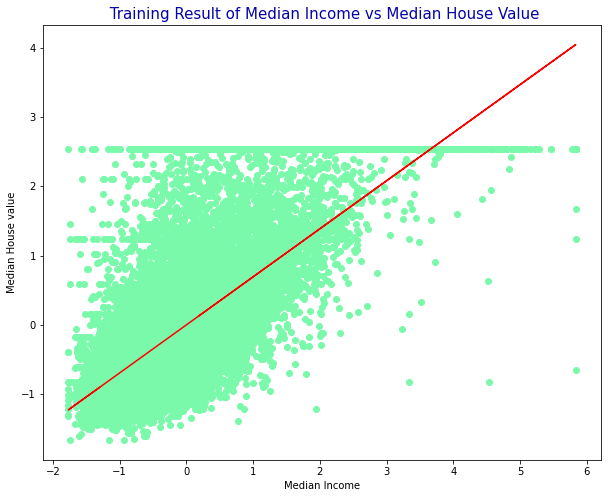

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_med,Y_train,color = "#7af9ab")
plt.plot(X_train_med,lr.predict(X_train_med),color = "red")
plt.title(" Training Result of Median Income vs Median House Value",fontsize = 15,color = "#0504aa")
plt.xlabel("Median Income")
plt.ylabel("Median House value")
plt.show()

#### Visualizing The Testing Set

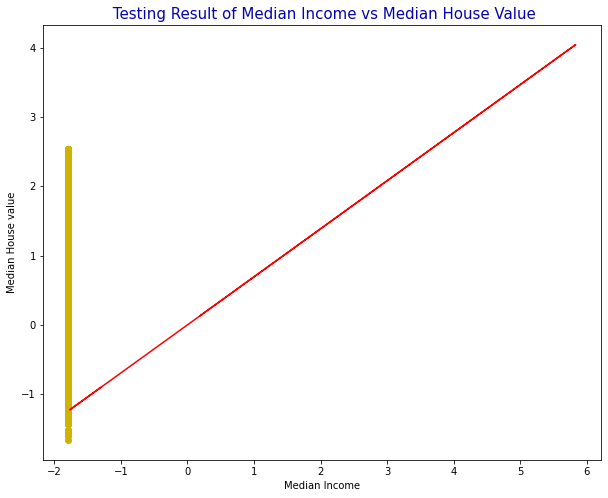

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(X_test_med,Y_test,color = "#ceb301")
plt.plot(X_train_med,lr.predict(X_train_med),color = "red")
plt.title(" Testing Result of Median Income vs Median House Value",fontsize = 15,color = "#0504aa")
plt.xlabel("Median Income")
plt.ylabel("Median House value")
plt.show()